<a href="https://colab.research.google.com/github/LashawnFofung/Python-Document-Preparation-and-Extraction/blob/main/src/Task_Analyze_a_Scanned_PDF_(End_to_End).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyze a Scanned PDF (End-to-End)

* Full OCR pipeline on a financial document
* Tesseract is an open-source OCR engine developed by Google to extract text from scanned documments

* **Data:** *MTG_10009588.pdf*

The scanned image is blurred (more noise) than `sample_mortgage_document.pdf` in [Extracting Text & Bounding Boxes from Scanned PDFs](https://github.com/LashawnFofung/Python-Document-Preparation-and-Extraction/blob/main/src/Task_Extracting_Text_%26_Bounding_Boxes_from_Scanned_PDFs.ipynb). In step 6, I used Median Blur  for a more aggressive denoising method and Otsu's Binarization for aggressive contrast enhancement.

In [ ]:
# =================================================
# Step 1: Install Dependencies
# ==================================================

!apt install tesseract-ocr
!pip install pymupdf pytesseract opencv-python pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [ ]:
# =================================================
# Step 2: Import Libraries
# ==================================================

import fitz # PyMuPDF - to read and convert PDF pages into images
import cv2 # OpenCV - helps clean up images and draw boxes around detected text
import pytesseract # Tesseract OCR - to extract text from scanned images
import numpy as np # NumPy - handles numbers and makes working with images easier
from PIL import Image # Pillow (PIL) - lets us display and work with images in Colab


In [ ]:
# =========================================
# Step 3: Load Scanned PDF
# =========================================

#Upload "MTG_10009588.pdf" manually in Colab
from google.colab import files

uploaded = files.upload()
pdf_path = list(uploaded.keys())[0] # Get uploaded file name

#Open the Mortgage Document "MTG_10009588.pdf"
doc = fitz.open(pdf_path)

Saving MTG_10009588.pdf to MTG_10009588.pdf


In [ ]:
# =========================================
# Step 4: Try Extracting text Without OCR
# Will Fail
# Document does no contain actual text
# Document is an image (Scanned PDF)
# =========================================

page = doc[0]
text = page.get_text("text") # Normal text extraction
print("Extracted Text:", text) # Expecting empty or incorrect output


Extracted Text: 


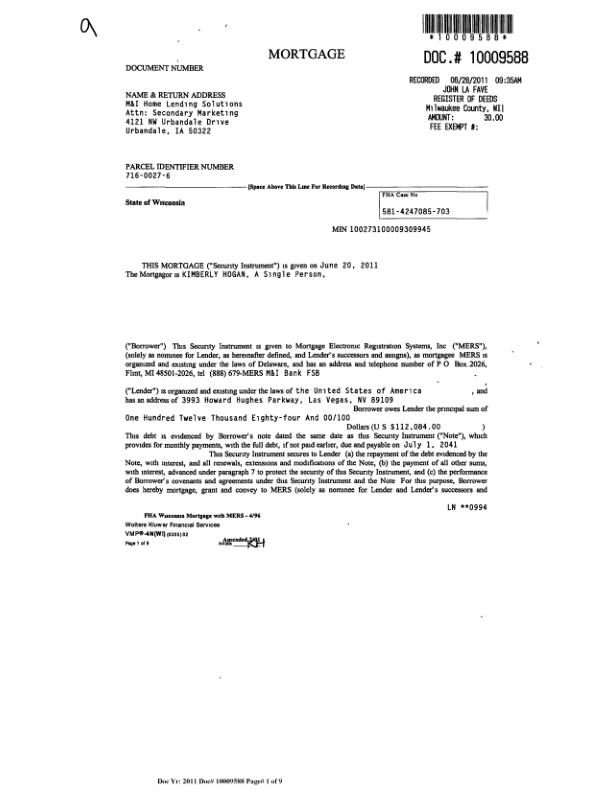

In [ ]:
# =============================================================================
# Step 5: Convert PDF to Image for OCR
# Takes a single page extracted from a PDF document using PyMuPDF (fitz),
# & converts into a format that can be processed by tools like OpenCV
# or Tesseract OCR, which typically require the data to be in an image format,
# usually NumPy array.
# =============================================================================

pix = page.get_pixmap() #Generate raterized image (pixel map)

#Convert the raw pixmap data into a PIL (Pillow) Image object
img = np.array(Image.frombytes("RGB", [pix.width, pix.height], pix.samples))

# Display the converted image using Pillow's display function
display(Image.fromarray(img)) # Display image

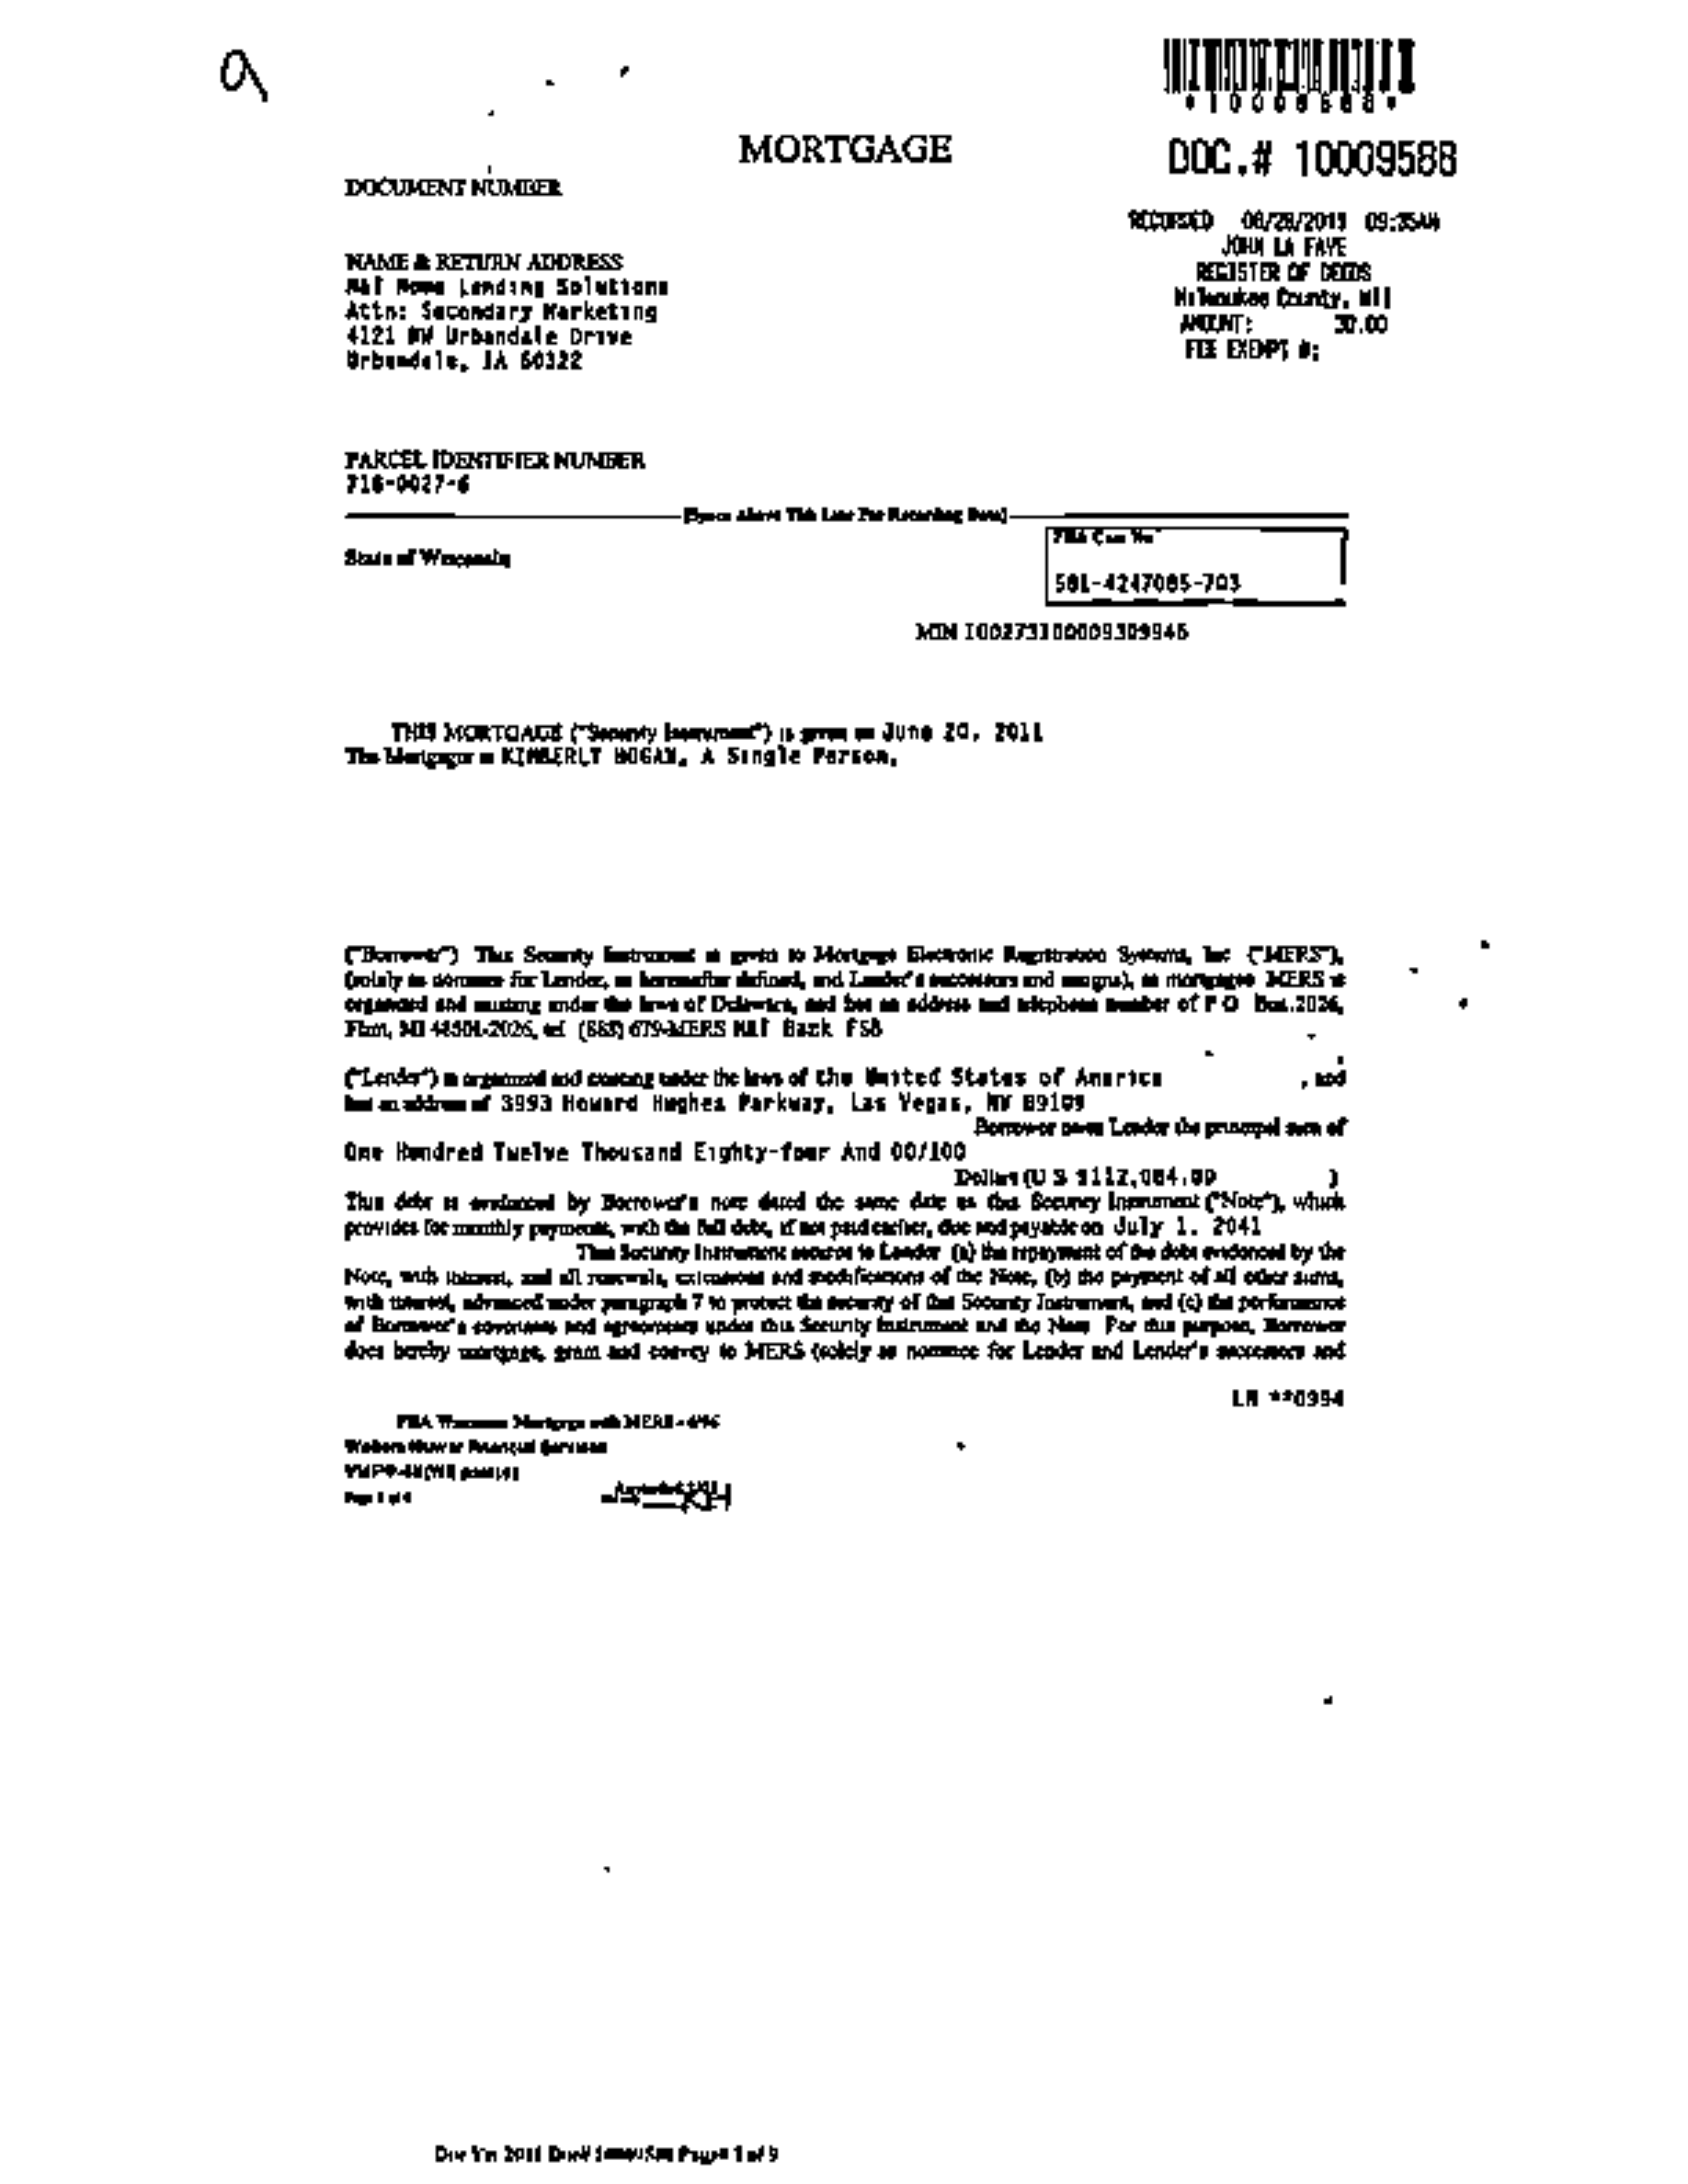

In [ ]:

# ==========================================================================
# Step 6: Preprocess Image for Better OCR Accuracy
# Use the OpenCV (cv2) library to manipulate the image.
# To clean up the image and enhance the text quality,
# Which significantly improves the accuracy of the OCR engine (Tesseract).
# ==========================================================================

#Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


# *****************2nd Method (Improved scanned image)*************************
# --- Improvement 1: Aggressive Denoising ---
# Use Fast NLM Denoising to clear up noise while preserving edges better than simple blurring.
gray = cv2.fastNlMeansDenoising(gray, None, 10, 7, 21)

# --- Improvement 2: Adaptive Gaussian Thresholding ---
# This applies a local, non-uniform threshold. It retains high contrast for OCR
# but is often better for uneven lighting and looks visually smoother/lighter
# than a global threshold like Otsu's.
gray = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


# --- Improvement 3: Higher Resizing Factor for Scanned Text ---
scale_percent = 300 # Increased from 200% to 300% for better OCR
width = int(gray.shape[1] * scale_percent / 100)
height = int(gray.shape[0] * scale_percent / 100)
# Use INTER_LINEAR for resizing to maintain crisp lines on the binary image
gray = cv2.resize(gray, (width, height), interpolation=cv2.INTER_LINEAR)

#Show the preprocessed image
display(Image.fromarray(gray))






# *****************1st Method (scanned image was not clear to read)*************************
#Apply Adaptive Thresholding for contrast enhancement
#gray = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

#Apply Bilateral Filtering to reduce noise while preserving edges
#gray = cv2.bilateralFilter(gray, 9, 75, 75)

#Resize image for better OCR accuracy (Tesseract performs better on larger text)
#scale_percent =200 # Increase image size by 200%
#width = int(gray.shape[1] * scale_percent / 100)
#height = int(gray.shape[0] * scale_percent / 100)
#gray = cv2.resize(gray, (width, height), interpolation=cv2.INTER_CUBIC)

#Show the preprocessed image
#display(Image.fromarray(gray))


In [ ]:
# ==================================================
# Step 7.1: Perform OCR on the Image
# ==================================================

#Use optimized Tesseract OCR configurations
custom_config = r'--oem 3 -l eng'
ocr_text = pytesseract.image_to_string(gray, config=custom_config)

print("OCR Extracted text:\n", ocr_text)


# ===================================================
# Step 7.2: Extract bounding Boxes from OCR Output
# ===================================================

ocr_data = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT)


#Print first 5 extracted words with bounding boxes
for i in range (5):
  print(f"Word: {ocr_data['text'][i]}, BBox: ({ocr_data['left'][i]}, {ocr_data['top'][i]}, {ocr_data['width'][i]}, {ocr_data['height'][i]})")




OCR Extracted text:
 = mga

MORTGAGE BOC.# 10009588

DOCUMENT NUMBER

SON EAE
Sat Powe Lending Solutions Mileoukes frinty, Ml]
acter Sevensars Werkety ng AAT! 7.0

rbandale Drive i ‘

Urbandale, 1A 60222 FEE EXD PF 8
FARCEL IDENTIFIER NUMBER
716-0027-6

Feces thir The Line Por Pstereg Bora)

State of Wecgealy ~ |
5OL-4247085-703

MIM 1002737 00009.309945

THES MORTOACE ("Seeerty beerynamt”> ip gore ee June 20, POLL
‘The Marigagor m KIMMERLT BOGAN, A Single Parson,

CBerewt”) Thu Scomty fetrooet ft pret Mortgage Electrorti¢ Beertireeon Seen, ee CMEPS), .
Grolaly ae Gromer for Lender, oo hereafter ehcfineed, ond Lede’ dé ecco od eg), ot tte ERS
Otgeaed and muting ender et bree of Dedirerica, dd See an addeees teed ieitpbeet Member of FO Bon. 2026,

Fh, MI 420H-2006, ef (BES) CTOAIERS MAT Bark FSS .
C Lends") m onteed add ceang oder the ews of Che Waited Statas of Anarice pk
feet an tre of 3993 Howerd Heghea Parkway, Las Vegas, A¥ 69199
Borronece peeve London the pruucred gern off
One Ken

In [ ]:
# ==========================================================
# Step 8: Post-OCR Processing & Extracting Key Information
# ==========================================================

import re
import json

# Step 8.1: Preprocess OCR Text (Cleaning & Formatting)
ocr_text = " ".join(ocr_text.split())  # Remove extra spaces & newlines
ocr_text = re.sub(r'[^a-zA-Z0-9\s,.%-]', '', ocr_text)  # Remove special chars

# Step 8.2: Fix Common OCR Errors
ocr_text = re.sub(r'\bL0AN\b', 'LOAN', ocr_text, flags=re.IGNORECASE)
ocr_text = re.sub(r'\bM0RTGAGE\b', 'MORTGAGE', ocr_text, flags=re.IGNORECASE)
ocr_text = re.sub(r'\b1NTEREST\b', 'INTEREST', ocr_text, flags=re.IGNORECASE)


print("Final Cleaned OCR Text:\n", ocr_text)

Final Cleaned OCR Text:
  mga MORTGAGE BOC. 10009588 DOCUMENT NUMBER SON EAE Sat Powe Lending Solutions Mileoukes frinty, Ml acter Sevensars Werkety ng AAT 7.0 rbandale Drive i  Urbandale, 1A 60222 FEE EXD PF 8 FARCEL IDENTIFIER NUMBER 716-0027-6 Feces thir The Line Por Pstereg Bora State of Wecgealy   5OL-4247085-703 MIM 1002737 00009.309945 THES MORTOACE Seeerty beerynamt ip gore ee June 20, POLL The Marigagor m KIMMERLT BOGAN, A Single Parson, CBerewt Thu Scomty fetrooet ft pret Mortgage Electrorti Beertireeon Seen, ee CMEPS, . Grolaly ae Gromer for Lender, oo hereafter ehcfineed, ond Lede d ecco od eg, ot tte ERS Otgeaed and muting ender et bree of Dedirerica, dd See an addeees teed ieitpbeet Member of FO Bon. 2026, Fh, MI 420H-2006, ef BES CTOAIERS MAT Bark FSS . C Lends m onteed add ceang oder the ews of Che Waited Statas of Anarice pk feet an tre of 3993 Howerd Heghea Parkway, Las Vegas, A 69199 Borronece peeve London the pruucred gern off One Kendred Twelve Thousand Eighty-foar

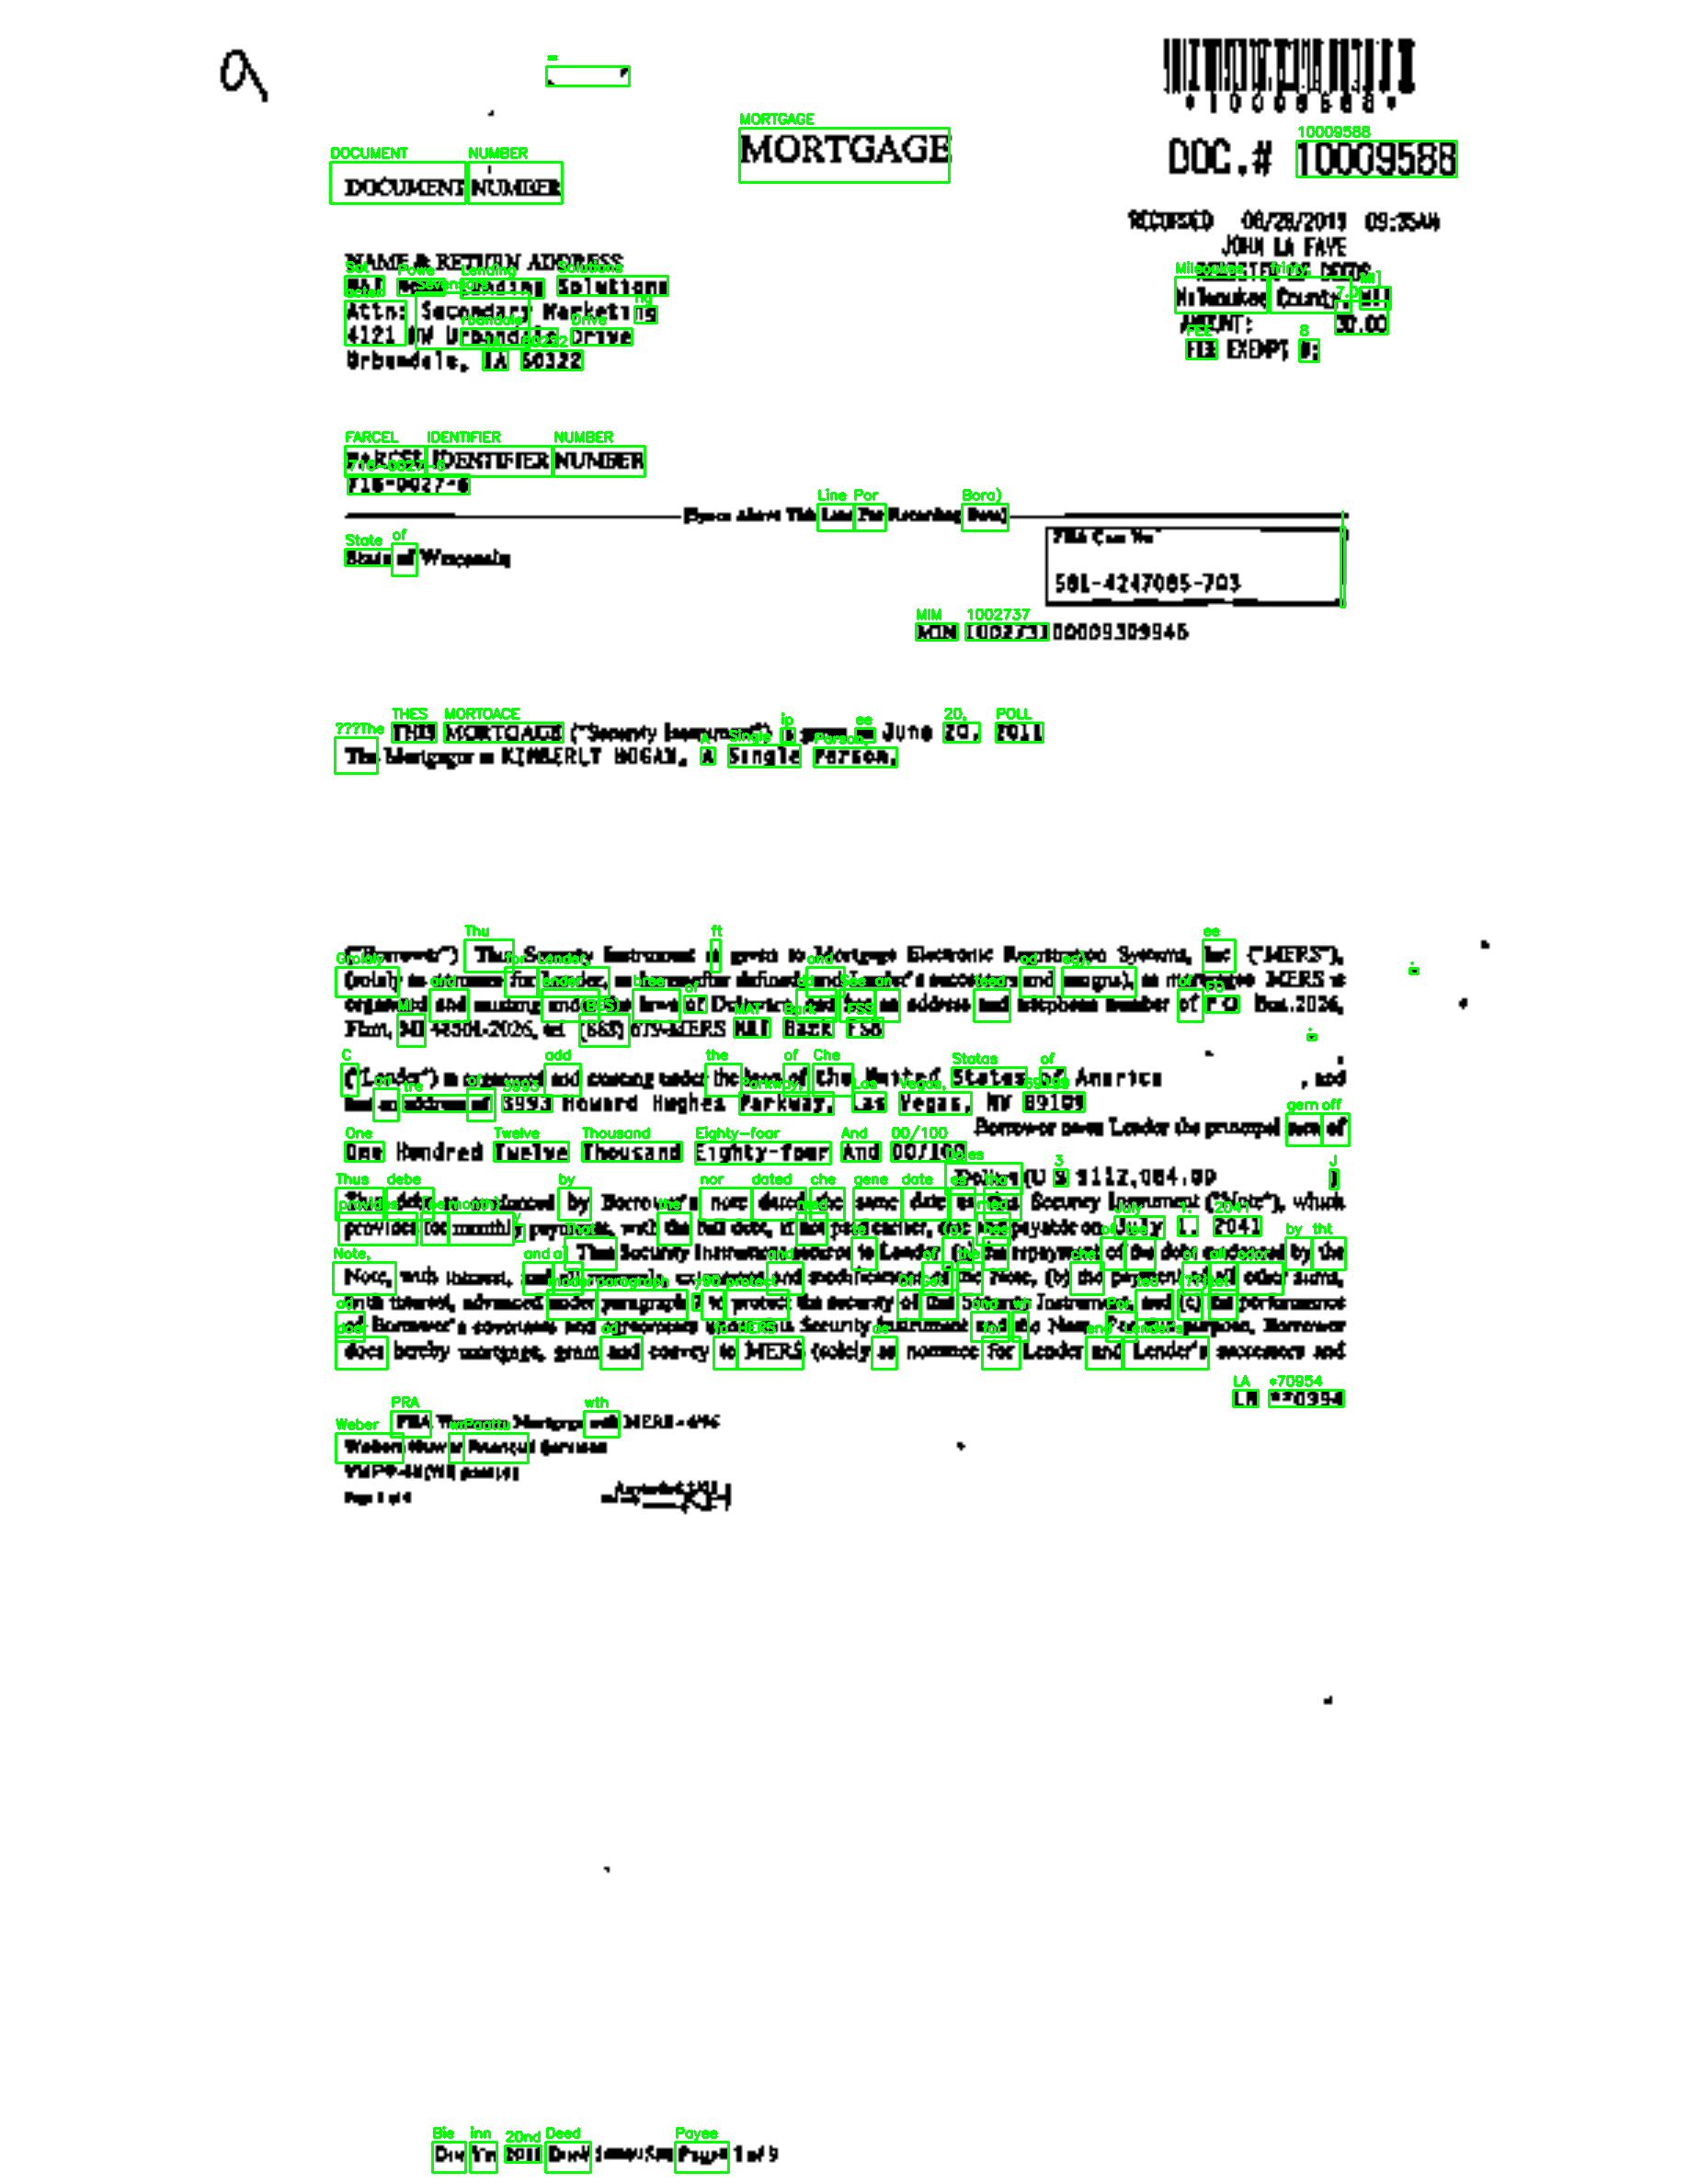

In [ ]:
# ==================================================================
# Step 9: Highlighting OCR Results with Bounding Boxes
# Takes the text results from a Tesseract OCR run
# Uses the positional data provided, by Tesseract
# to draw bounding boxes around each recognized word,
# and displays the image with these overlays.
# ==================================================================

import cv2
from PIL import Image

# Convert image to OpenCV BGR format
img_bgr = cv2.cvtColor(gray, cv2.COLOR_RGB2BGR)

# Get OpenCV image height for correct y-coordinate transformation
page_height = gray.shape[0]

# Define confidence threshold (ignore low-confidence words)
confidence_threshold = 40


# ==================================================================
# Step 9.1: Loop through Extracted OCR Words & Draw Bounding Boxes
# ==================================================================

for i in range(len(ocr_data["text"])):
    word = ocr_data["text"][i].strip()
    x, y, w, h = ocr_data["left"][i], ocr_data["top"][i], ocr_data["width"][i], ocr_data["height"][i]
    conf = int(ocr_data["conf"][i])  # Convert confidence to int

    # Ignore empty words & low-confidence OCR text
    if not word or conf < confidence_threshold:
        continue

    # Fix y-coordinate to match OpenCV's top-left origin
    #y = page_height - y

    # Draw bounding box
    cv2.rectangle(img_bgr, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(img_bgr, word, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


# ==================================================================
# Step 9.2: Convert Back to RGB & Display the Image
# ==================================================================

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img_rgb))


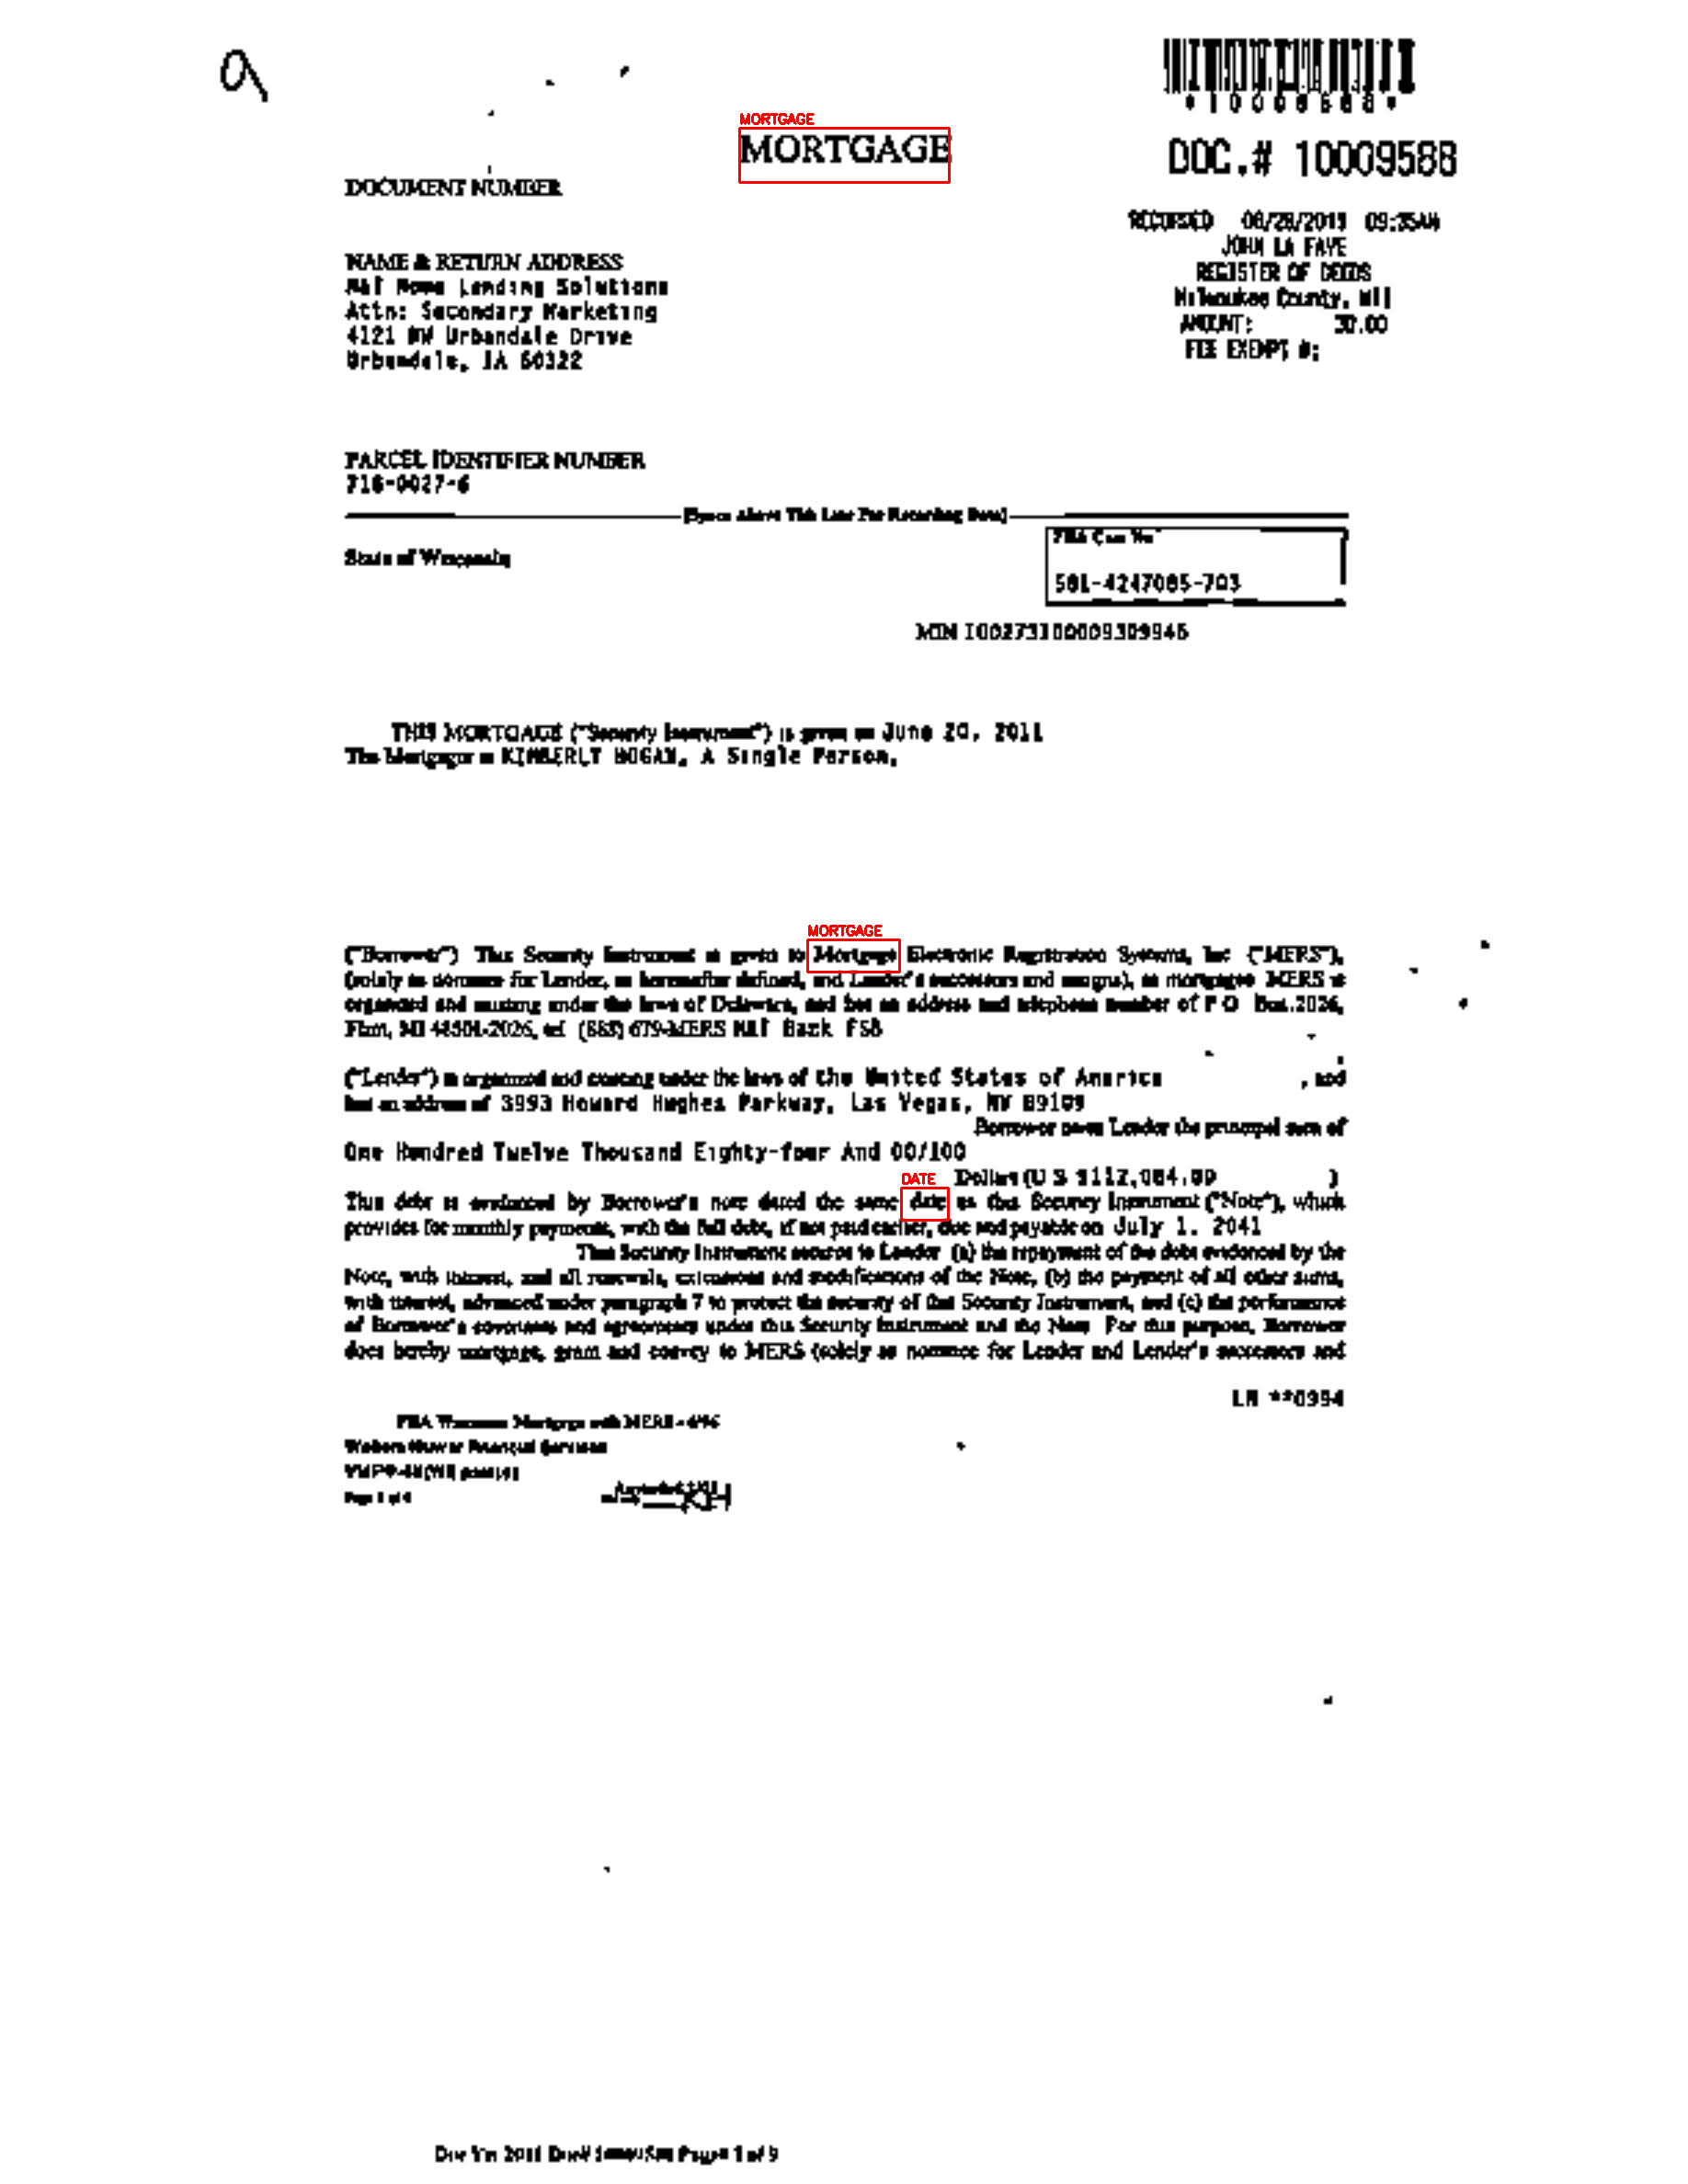

In [ ]:

# ========================================================
# Step 10: Draw Bounding Boxes
# on Relevant Key Fields from Mortgage Document
# Visual Annotation of OCR results
# ========================================================

import cv2

# Convert image to OpenCV BGR format
img_bgr = cv2.cvtColor(gray, cv2.COLOR_RGB2BGR)

# Define key fields dynamically based on document content
key_fields = ["MORTGAGE", "NOTE", "LENDER", "PROPERTY ADDRESS", "DATE", "SIGNATURE"]


# --- Improvement: Define an expansion margin for the bounding box ---
expansion_margin = 10

# Loop through extracted OCR words
for i in range(len(ocr_data["text"])):
    word = ocr_data["text"][i].strip().upper()  # Convert to uppercase for better matching
    x, y, w, h = ocr_data["left"][i], ocr_data["top"][i], ocr_data["width"][i], ocr_data["height"][i]

    if word in key_fields:  # Highlight only key fields found in the document
        cv2.rectangle(img_bgr, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red bounding box
        cv2.putText(img_bgr, word, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Convert back to RGB for display
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img_rgb))

In [ ]:
# ==========================================================
# Step 11: Extract Key Fields into Structured JSON Data
# Transforming the visual annotations into structured data
# ==========================================================

import json

# Initialize an empty dictionary to store extracted key field data
extracted_data = {}

# Loop through detected words to extract key fields
for i in range(len(ocr_data["text"])):
    word = ocr_data["text"][i].strip().upper()
    x, y, w, h = ocr_data["left"][i], ocr_data["top"][i], ocr_data["width"][i], ocr_data["height"][i]

    if word in key_fields:
        extracted_data[word] = {
            "text": word,
            "bounding_box": [x, y, w, h]
        }

# Convert extracted data into JSON format
json_output = json.dumps(extracted_data, indent=4)

# Print structured JSON output
print(json_output)


{
    "MORTGAGE": {
        "text": "MORTGAGE",
        "bounding_box": [
            878,
            1022,
            100,
            35
        ]
    },
    "DATE": {
        "text": "DATE",
        "bounding_box": [
            980,
            1292,
            51,
            35
        ]
    }
}
